<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/corporate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score


In [44]:
#importing data from excelsheet
corporate_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(corporate_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [45]:
corporate_mod=data.groupby('Segment')
corporate_data=corporate_mod.get_group('Corporate')
corporate_data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3256,3257,CA-2015-155453,2015-08-09,2015-08-14,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Jacksonville,...,32216,South,OFF-LA-10001613,Office Supplies,Labels,Avery File Folder Labels,4.608,2,0.2,1.6704
4686,4687,CA-2016-159912,2016-08-29,2016-09-03,Standard Class,GB-14530,George Bell,Corporate,United States,Philadelphia,...,19120,East,OFF-FA-10000053,Office Supplies,Fasteners,Revere Boxed Rubber Bands by Revere,10.584,7,0.2,-2.3814
8580,8581,CA-2014-130673,2014-05-20,2014-05-22,Second Class,MC-17590,Matt Collister,Corporate,United States,San Marcos,...,78666,Central,FUR-FU-10003489,Furniture,Furnishings,Contemporary Borderless Frame,10.332,3,0.6,-5.9409
8433,8434,US-2014-127635,2014-09-14,2014-09-18,Second Class,SC-20260,Scott Cohen,Corporate,United States,Corpus Christi,...,78415,Central,OFF-PA-10004610,Office Supplies,Paper,Xerox 1900,6.848,2,0.2,2.1400
3750,3751,CA-2017-161956,2017-08-27,2017-08-29,Second Class,DR-12880,Dan Reichenbach,Corporate,United States,Inglewood,...,90301,West,OFF-SU-10002503,Office Supplies,Supplies,Acme Preferred Stainless Steel Scissors,28.400,5,0.0,8.2360


In [46]:
corporate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 2 to 9988
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3020 non-null   int64         
 1   Order ID       3020 non-null   object        
 2   Order Date     3020 non-null   datetime64[ns]
 3   Ship Date      3020 non-null   datetime64[ns]
 4   Ship Mode      3020 non-null   object        
 5   Customer ID    3020 non-null   object        
 6   Customer Name  3020 non-null   object        
 7   Segment        3020 non-null   object        
 8   Country        3020 non-null   object        
 9   City           3020 non-null   object        
 10  State          3020 non-null   object        
 11  Postal Code    3020 non-null   int64         
 12  Region         3020 non-null   object        
 13  Product ID     3020 non-null   object        
 14  Category       3020 non-null   object        
 15  Sub-Category   3020 non-nu

In [47]:
for i in corporate_data.columns:
  print(i,':','\t',corporate_data[i].isnull().sum())

Row ID : 	 0
Order ID : 	 0
Order Date : 	 0
Ship Date : 	 0
Ship Mode : 	 0
Customer ID : 	 0
Customer Name : 	 0
Segment : 	 0
Country : 	 0
City : 	 0
State : 	 0
Postal Code : 	 0
Region : 	 0
Product ID : 	 0
Category : 	 0
Sub-Category : 	 0
Product Name : 	 0
Sales : 	 0
Quantity : 	 0
Discount : 	 0
Profit : 	 0


In [48]:
for i in corporate_data.columns:
  print(i,':','\n',corporate_data[i].unique())

Row ID : 
 [   3   22   23 ... 9967 9988 9989]
Order ID : 
 ['CA-2016-138688' 'CA-2016-137330' 'CA-2016-117590' ... 'CA-2015-141593'
 'CA-2016-146374' 'CA-2017-163629']
Order Date : 
 <DatetimeArray>
['2016-06-12 00:00:00', '2016-12-09 00:00:00', '2016-12-08 00:00:00',
 '2017-09-10 00:00:00', '2016-07-17 00:00:00', '2017-09-19 00:00:00',
 '2016-03-11 00:00:00', '2016-12-11 00:00:00', '2014-12-05 00:00:00',
 '2017-12-09 00:00:00',
 ...
 '2014-06-10 00:00:00', '2014-08-20 00:00:00', '2017-03-16 00:00:00',
 '2014-02-14 00:00:00', '2015-06-08 00:00:00', '2016-05-02 00:00:00',
 '2014-04-03 00:00:00', '2015-09-13 00:00:00', '2016-06-03 00:00:00',
 '2014-03-02 00:00:00']
Length: 830, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-06-16 00:00:00', '2016-12-13 00:00:00', '2016-12-10 00:00:00',
 '2017-09-15 00:00:00', '2016-07-22 00:00:00', '2017-09-23 00:00:00',
 '2016-03-13 00:00:00', '2016-12-17 00:00:00', '2014-12-10 00:00:00',
 '2017-12-11 00:00:00',
 ...
 '2017-03-21 00:00:00',

In [49]:
corporate_data.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,3020.000000,3020,3020,3020,3020,3020,3020,3020,3020,3020,...,3020.000000,3020,3020,3020,3020,3020,3020.000000,3020.000000,3020.000000,3020.000000
unique,NaN,1514,NaN,NaN,4,236,236,1,1,340,...,NaN,4,1456,3,17,1444,NaN,NaN,NaN,NaN
top,NaN,CA-2017-157987,NaN,NaN,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,NaN,West,FUR-CH-10002880,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,1812,32,32,3020,3020,266,...,NaN,960,8,1820,473,18,NaN,NaN,NaN,NaN
mean,5134.017881,NaN,2016-04-27 17:31:52.052980224,2016-05-01 17:42:50.066225152,NaN,NaN,NaN,NaN,NaN,NaN,...,54482.228477,NaN,NaN,NaN,NaN,NaN,233.823300,3.843709,0.158228,30.456667
min,3.000000,NaN,2014-01-06 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1453.000000,NaN,NaN,NaN,NaN,NaN,0.556000,1.000000,0.000000,-3839.990400
25%,2584.000000,NaN,2015-05-03 12:00:00,2015-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,22153.000000,NaN,NaN,NaN,NaN,NaN,17.469000,2.000000,0.000000,1.928400
50%,5340.500000,NaN,2016-07-02 00:00:00,2016-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,53209.000000,NaN,NaN,NaN,NaN,NaN,56.540000,3.000000,0.200000,8.694000
75%,7646.500000,NaN,2017-05-13 00:00:00,2017-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,212.895000,5.000000,0.200000,29.843500
max,9989.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,17499.950000,14.000000,0.800000,8399.976000


**Details about Corporate category**

In [50]:
corporate_data['Category'].value_counts()

,count
Category,
Office Supplies,1820
Furniture,646
Technology,554


**Exploratory Data Analysis**

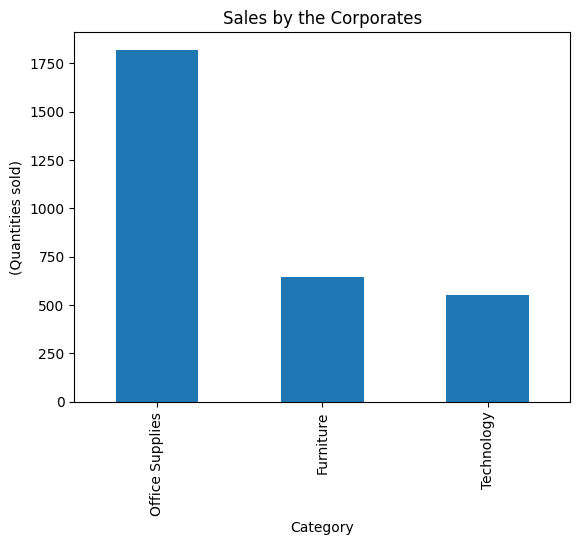

In [51]:
#sales of category items under Corporate segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
corporate_data['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Corporates")
plt.show()

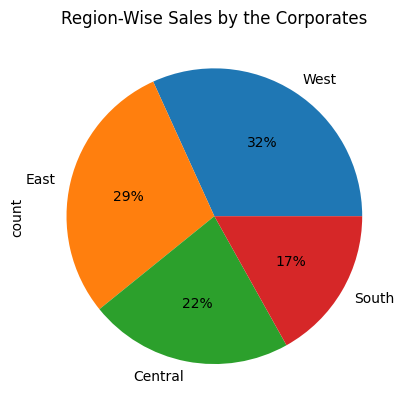

In [52]:
#distirbution of sales pattern about the region by the Corporate category
corporate_data['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

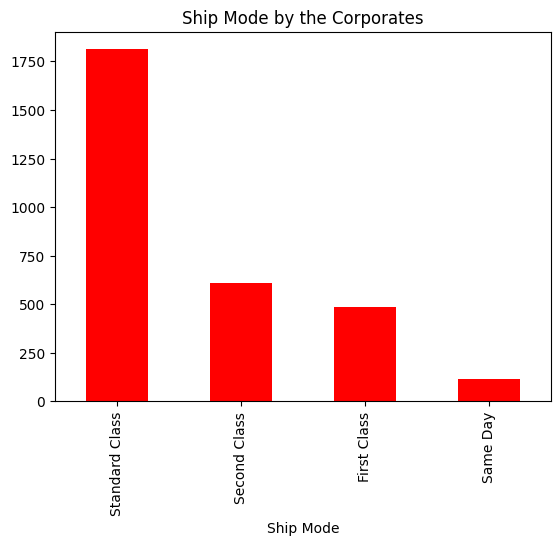

In [53]:
#Shipping mode of items ordered by Corporate segment
corporate_data['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

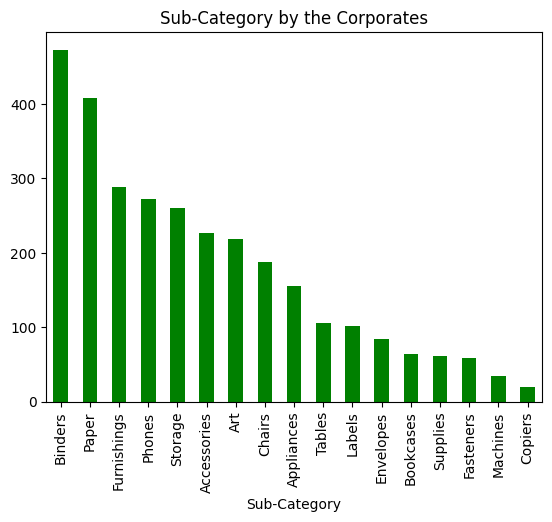

In [54]:
#sub-category items ordered by the Corporate segment
corporate_data['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

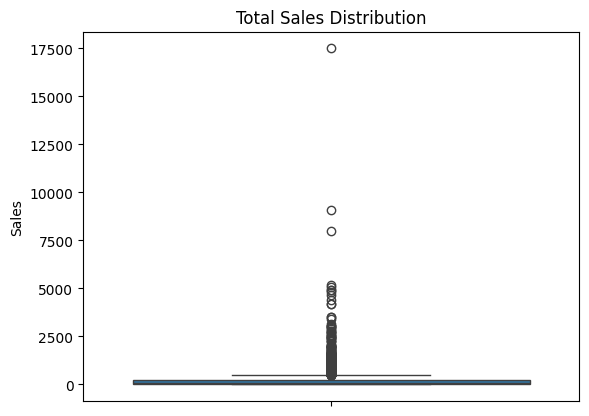

In [55]:
#sales pattern distribution
sns.boxplot(corporate_data['Sales'])
plt.title("Total Sales Distribution")
plt.show()

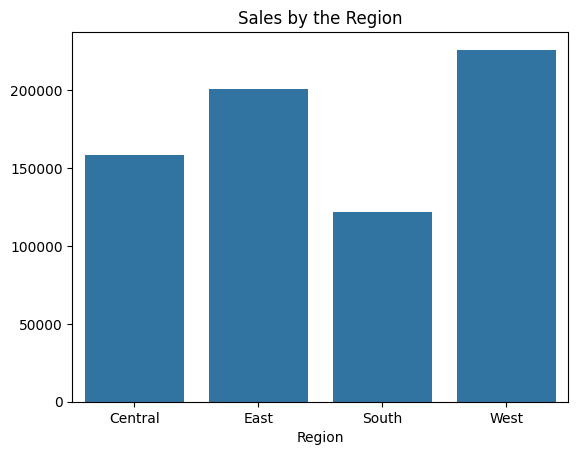

In [56]:
#sales distribution pattern region-wise
sales_region=corporate_data.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

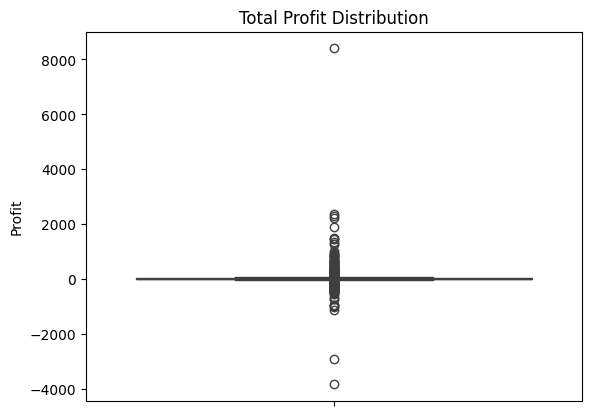

In [57]:
#profit pattern distribution
sns.boxplot(corporate_data['Profit'])
plt.title("Total Profit Distribution")
plt.show()

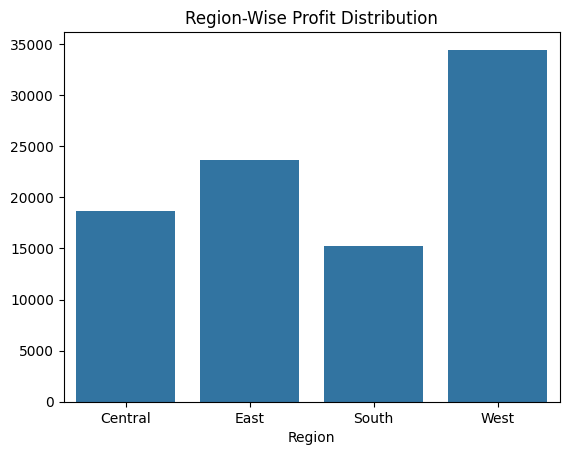

In [58]:
#profit pattern distribution
profit_by_region=corporate_data.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

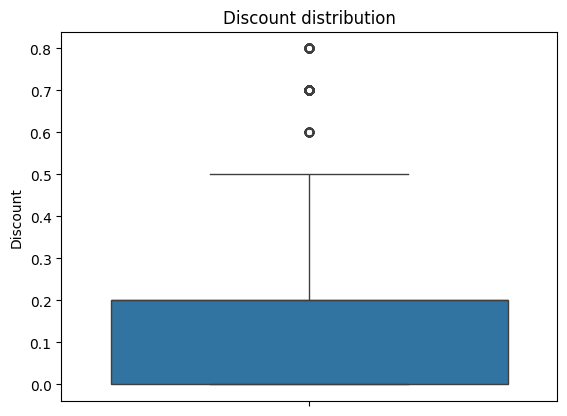

In [59]:
#discount pattern distribution
sns.boxplot(corporate_data['Discount'])
plt.title("Discount distribution")
plt.show()

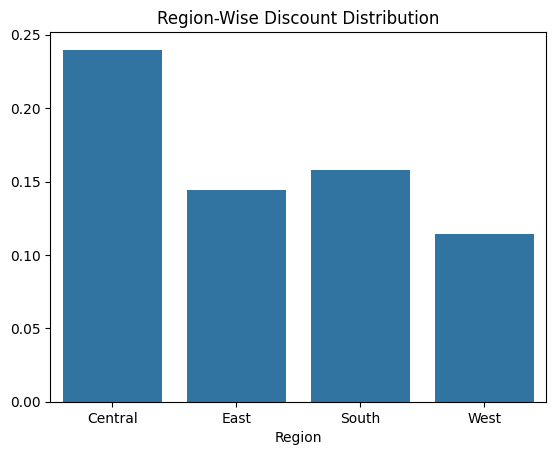

In [60]:
#discount pattern distribution
discount_by_region=corporate_data.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

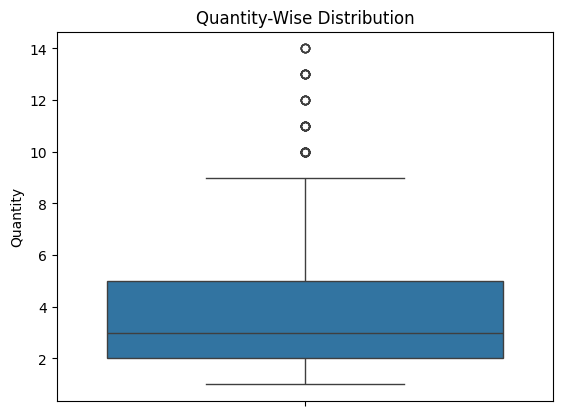

In [61]:
#quantity pattern distribution
sns.boxplot(corporate_data['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

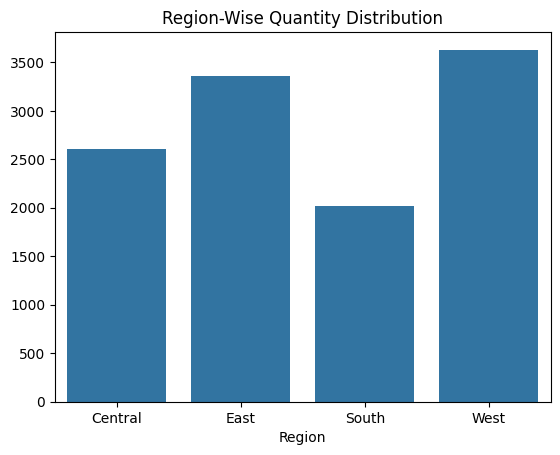

In [62]:
#quantity pattern distribution
quantity_by_region=corporate_data.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [63]:
oe=OrdinalEncoder()
corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
corporate_data['City']=oe.fit_transform(corporate_data[['City']])
corporate_data['State']=oe.fit_transform(corporate_data[['State']])
corporate_data['Region']=oe.fit_transform(corporate_data[['Region']])
corporate_data['Category']=oe.fit_transform(corporate_data[['Category']])
corporate_data['Sub-Category']=oe.fit_transform(corporate_data[['Sub-Category']])
corporate_data['Segment']=oe.fit_transform(corporate_data[['Segment']])
corporate_data['Country']=oe.fit_transform(corporate_data[['Country']])

<ipython-input-63-80ffab47515d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
<ipython-input-63-80ffab47515d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['City']=oe.fit_transform(corporate_data[['City']])
<ipython-input-63-80ffab47515d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [64]:
corporate_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,2.0,DV-13045,Darrin Van Huff,0.0,0.0,168.0,...,90036,3.0,OFF-LA-10000240,1.0,10.0,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
21,22,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AR-10000246,1.0,2.0,Newell 318,19.460,7,0.0,5.0596
22,23,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AP-10001492,1.0,1.0,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884
35,36,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,TEC-PH-10004977,2.0,13.0,GE 30524EE4,1097.544,7,0.2,123.4737
36,37,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,FUR-FU-10003664,0.0,9.0,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


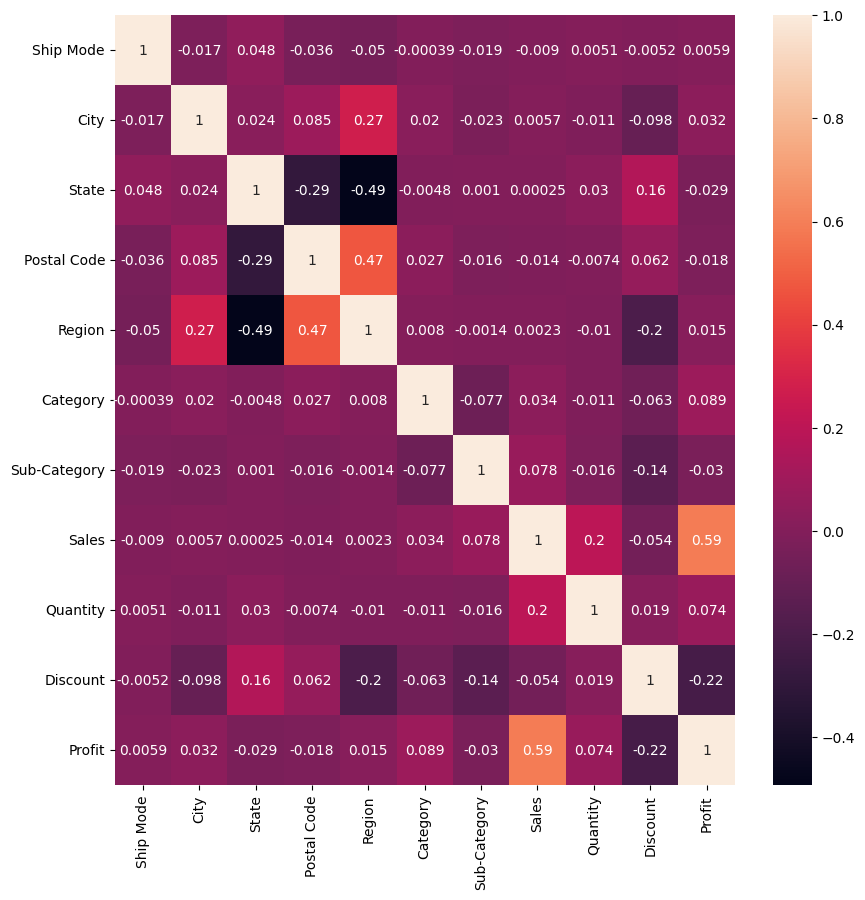

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [66]:
mod_corporate_data=pd.DataFrame(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
mod_corporate_data.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,2.0,168.0,3.0,90036,3.0,1.0,10.0,14.620,2,0.0,6.8714
21,3.0,106.0,24.0,68025,0.0,1.0,2.0,19.460,7,0.0,5.0596
22,3.0,106.0,24.0,68025,0.0,1.0,1.0,60.340,7,0.0,15.6884
35,0.0,262.0,39.0,75080,0.0,2.0,13.0,1097.544,7,0.2,123.4737
36,0.0,262.0,39.0,75080,0.0,0.0,9.0,190.920,5,0.6,-147.9630


In [67]:
#splitting the dataset
x=mod_corporate_data.drop(columns=['Sales','Profit'],axis='1')
y=mod_corporate_data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Predictive Models**

In [68]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor()
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [69]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

In [70]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

**Predictive Model's Performance**

Performance of Model 1:

Mean Squared Error: 301285.1004702256 

Root Mean Squared Error: 548.8944347233132 

Mean Absolute Error: 249.22709958133777 

Explained Variance Score: 0.04156409591920107 

R2 Score: 0.04150600334223431 





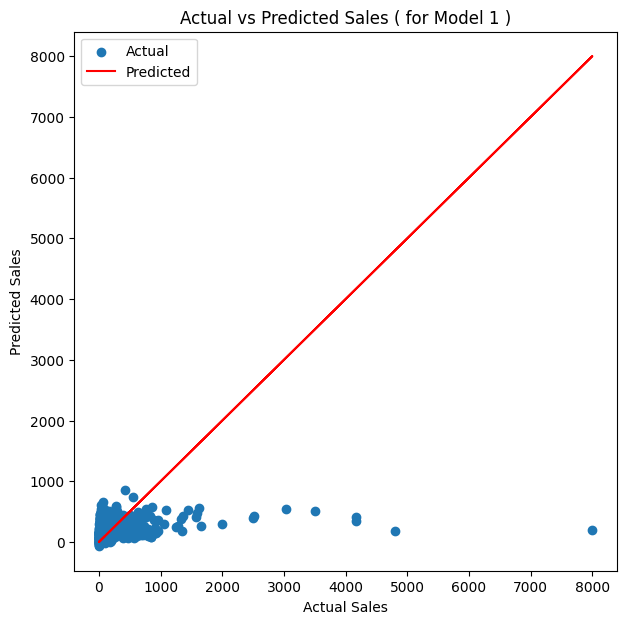



Performance of Model 2:

Mean Squared Error: 277986.6768688551 

Root Mean Squared Error: 527.2444185279301 

Mean Absolute Error: 211.77202021777995 

Explained Variance Score: 0.11564603723885092 

R2 Score: 0.11562649293382032 





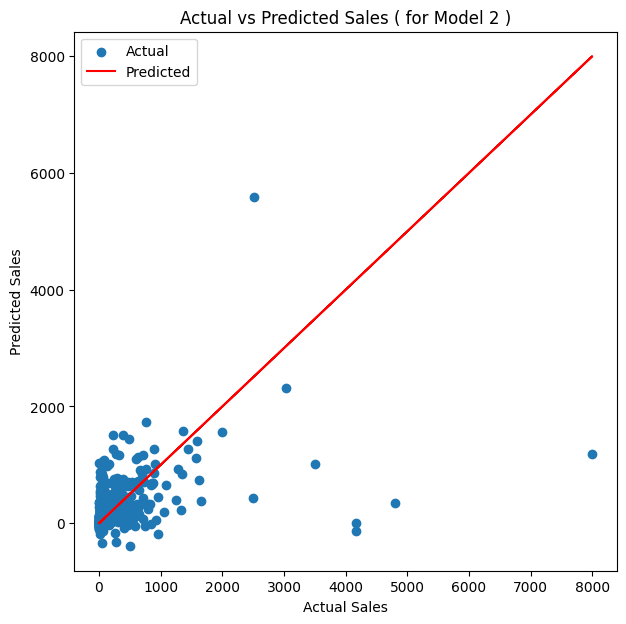



Performance of Model 3:

Mean Squared Error: 271799.49851500755 

Root Mean Squared Error: 521.3439349556179 

Mean Absolute Error: 201.22281768978814 

Explained Variance Score: 0.1355867548750388 

R2 Score: 0.13531008597960315 





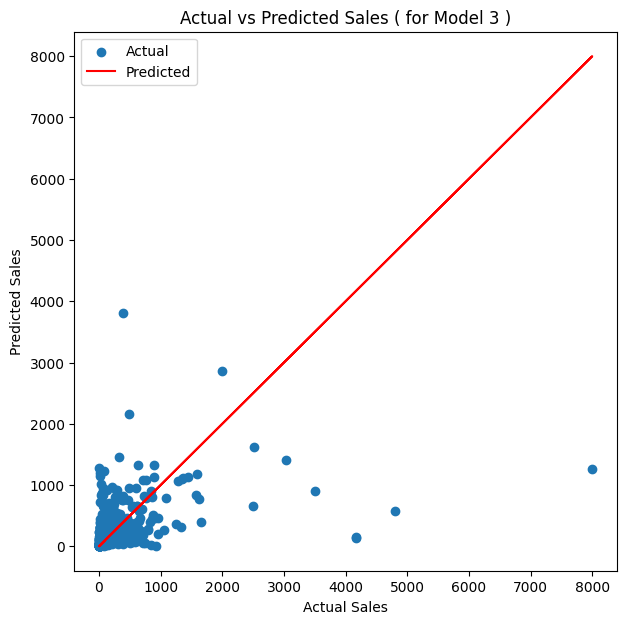



Performance of Model 4:

Mean Squared Error: 235734.89557330246 

Root Mean Squared Error: 485.52538097745463 

Mean Absolute Error: 187.2584418635284 

Explained Variance Score: 0.2500742923643342 

R2 Score: 0.2500442874303863 





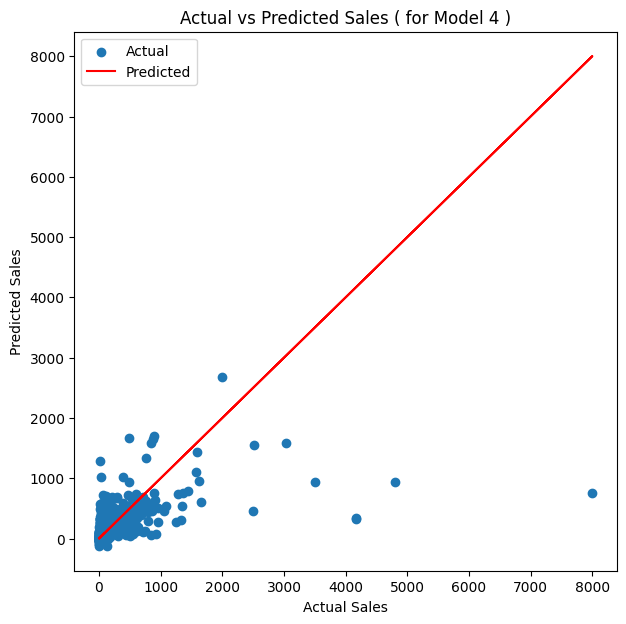



Performance of Model 5:

Mean Squared Error: 445662.4102065369 

Root Mean Squared Error: 667.5795160177826 

Mean Absolute Error: 498.96258847580106 

Explained Variance Score: 0.058487137436042946 

R2 Score: -0.41780905876960395 





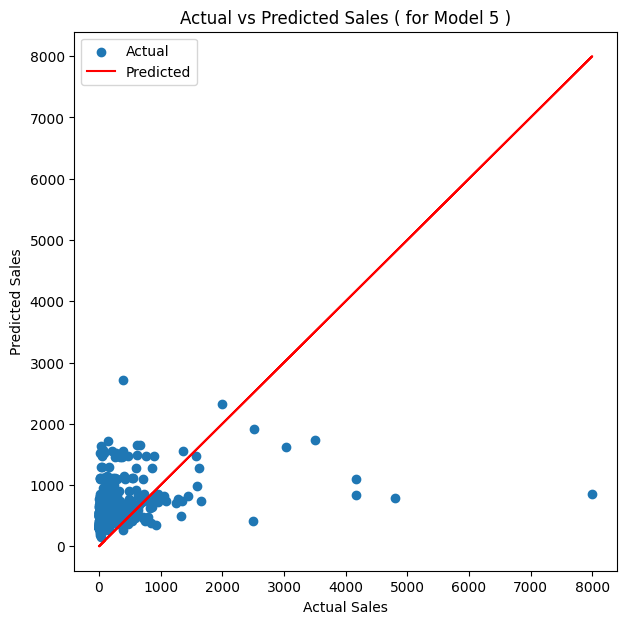



Performance of Model 6:

Mean Squared Error: 472215.29761507525 

Root Mean Squared Error: 687.1792325260385 

Mean Absolute Error: 254.66574370860928 

Explained Variance Score: -0.5013996333430513 

R2 Score: -0.5022831437319593 





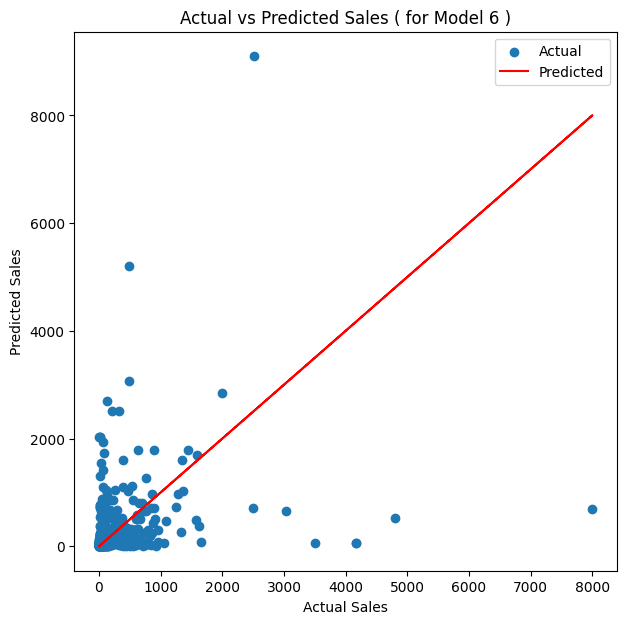



Performance of Model 7:

Mean Squared Error: 379216.2726736208 

Root Mean Squared Error: 615.8053853886152 

Mean Absolute Error: 268.93858470198677 

Explained Variance Score: -0.20634234365227222 

R2 Score: -0.2064204974799948 





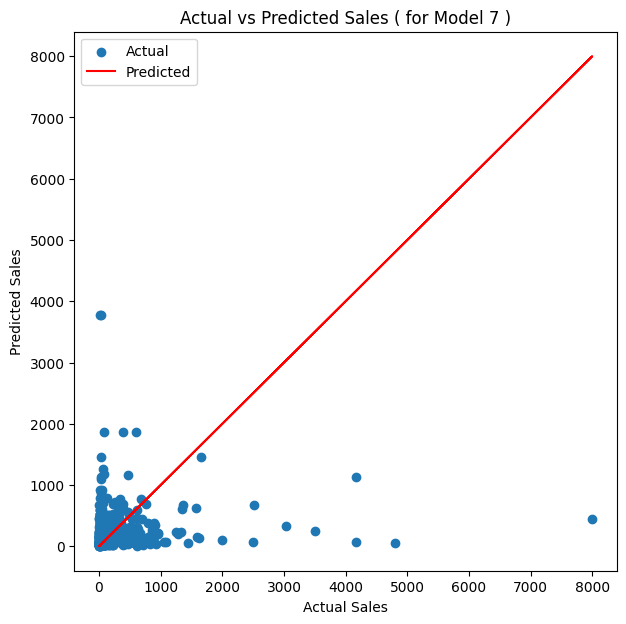



Performance of Model 8:

Mean Squared Error: 339703.1692063151 

Root Mean Squared Error: 582.8406036012892 

Mean Absolute Error: 200.52815524683638 

Explained Variance Score: -0.00019758237124700706 

R2 Score: -0.08071540153061041 





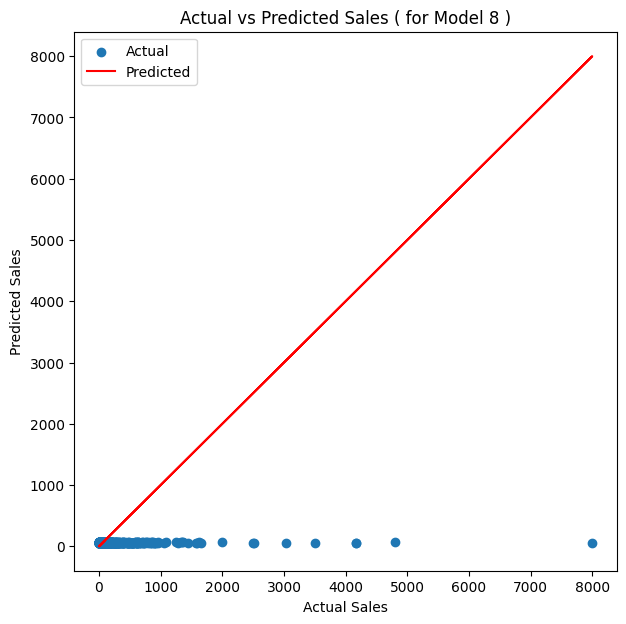



Performance of Model 9:

Mean Squared Error: 301242.9494570524 

Root Mean Squared Error: 548.8560370962975 

Mean Absolute Error: 249.15888401105497 

Explained Variance Score: 0.04169850936729824 

R2 Score: 0.04164010055785017 





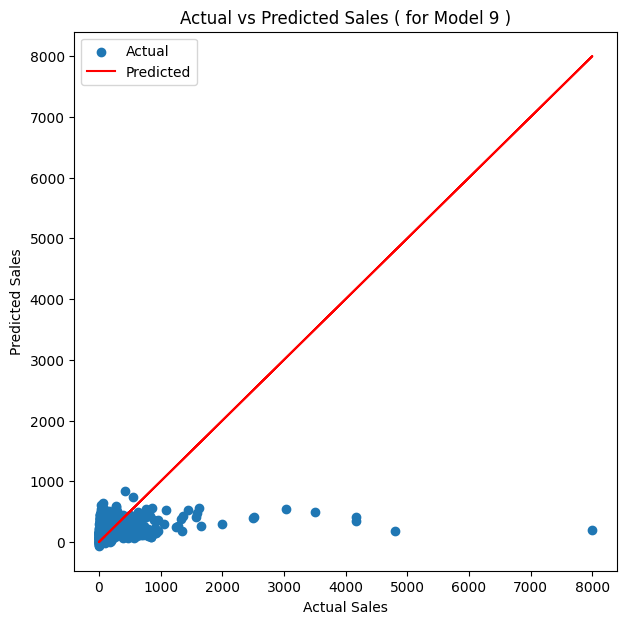



Performance of Model 10:

Mean Squared Error: 300663.7782617655 

Root Mean Squared Error: 548.328166577065 

Mean Absolute Error: 248.3649504134646 

Explained Variance Score: 0.04354797193246085 

R2 Score: 0.04348264807464797 





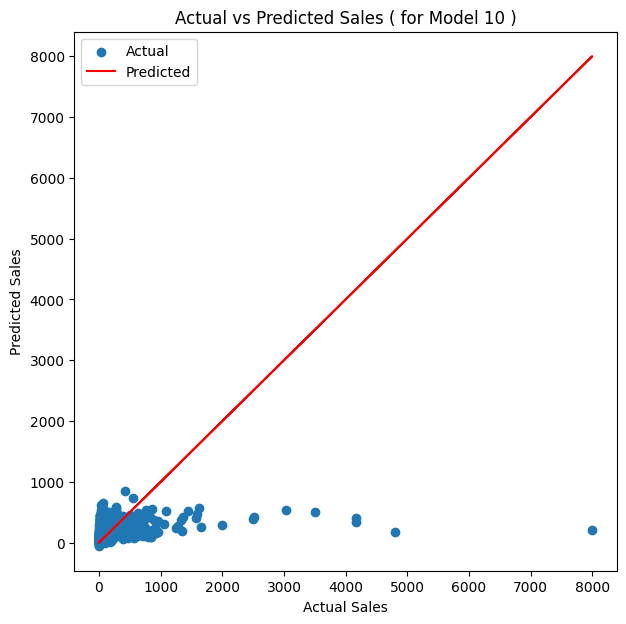

In [71]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1

Mean Squared Error: 255405.78046870162
Root Mean Squared Error: 505.37686974049535
Mean Absolute Error: 189.7165354145197
Explained Variance Score: 0.2967920673071922
R2 Score: 0.18746427583419623




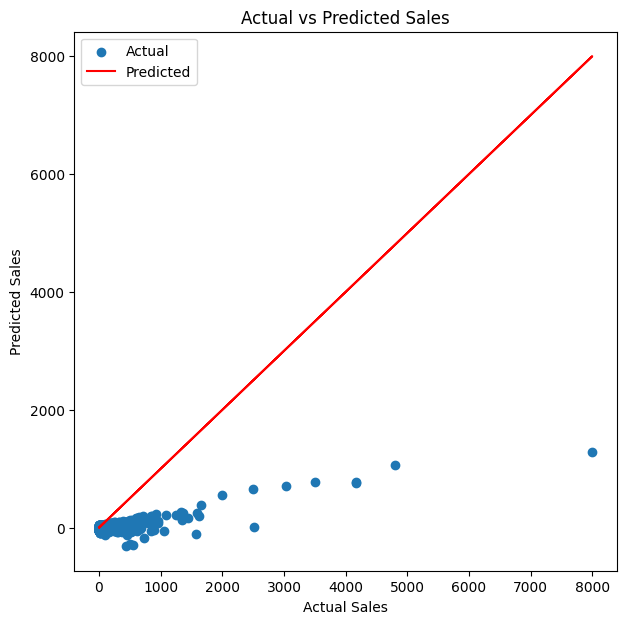

In [36]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.show()

In [37]:
m=mod_corporate_data.drop(columns=['Profit'],axis='1')
n=mod_corporate_data['Profit']
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.2,random_state=42)

In [38]:
model_1.fit(m_train, n_train)
model_2.fit(m_train, n_train)
model_3.fit(m_train, n_train)
model_4.fit(m_train, n_train)
model_5.fit(m_train, n_train)
model_6.fit(m_train, n_train)
model_7.fit(m_train, n_train)
model_8.fit(m_train, n_train)
model_9.fit(m_train, n_train)
model_10.fit(m_train, n_train)

Lasso()

In [39]:
pred_1 = model_1.predict(m_test)
pred_2 = model_2.predict(m_test)
pred_3 = model_3.predict(m_test)
pred_4=model_4.predict(m_test)
pred_5=model_5.predict(m_test)
pred_6=model_6.predict(m_test)
pred_7=model_7.predict(m_test)
pred_8=model_8.predict(m_test)
pred_9=model_9.predict(m_test)
pred_10=model_10.predict(m_test)

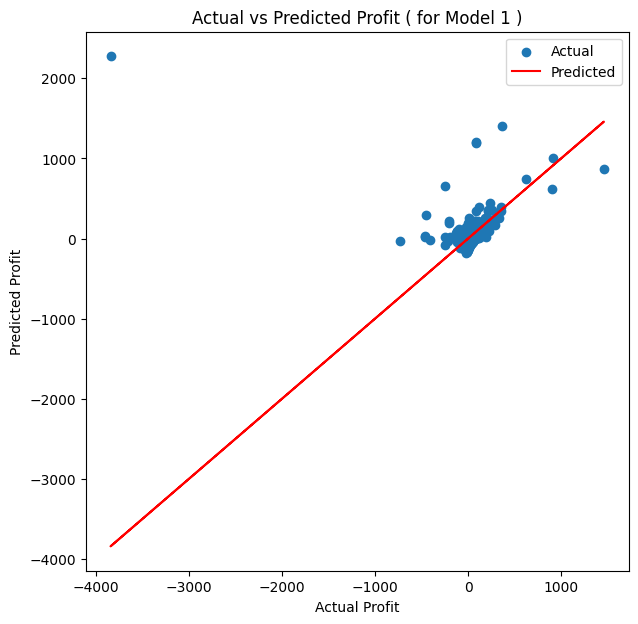

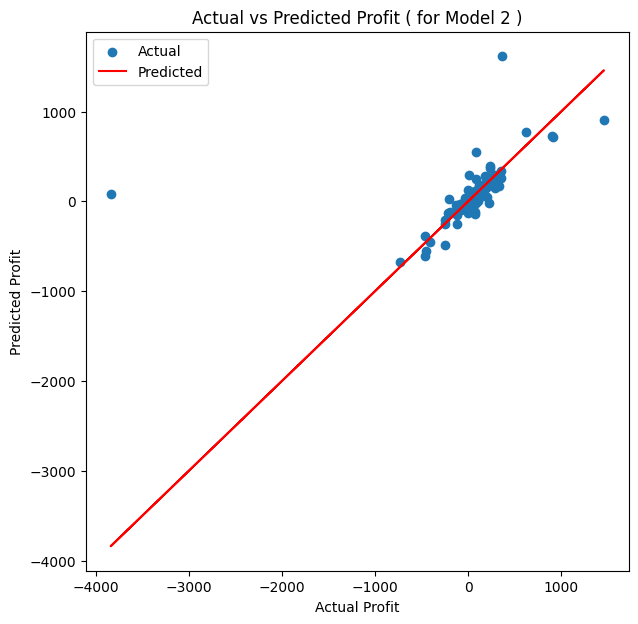

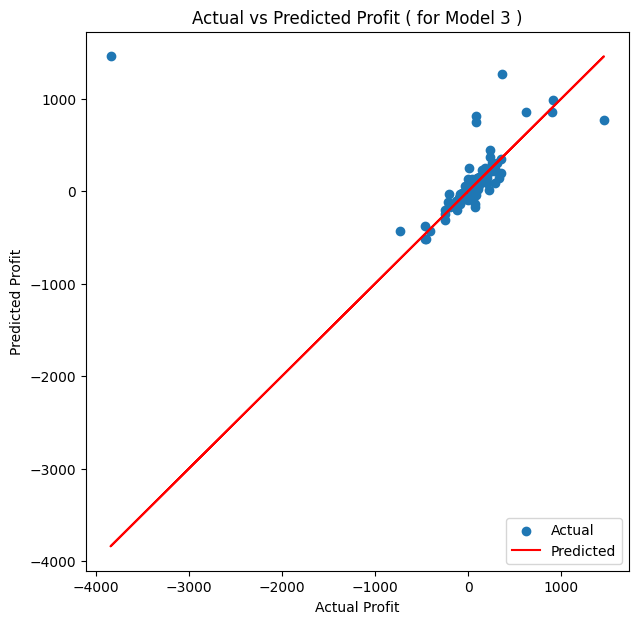

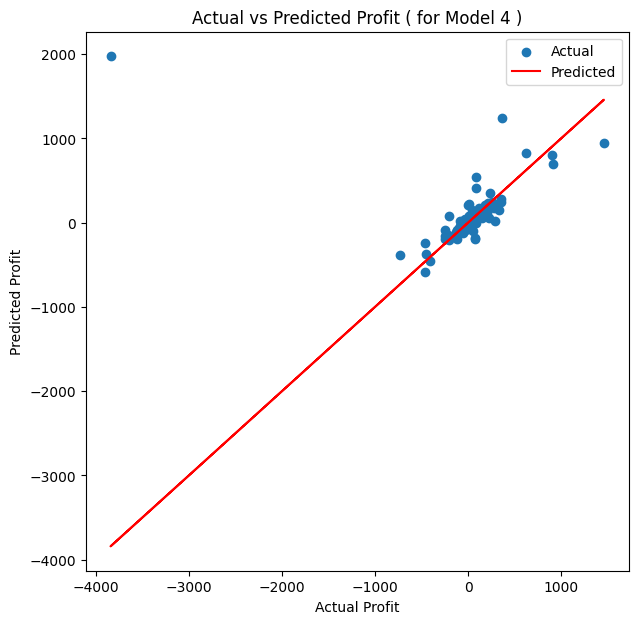

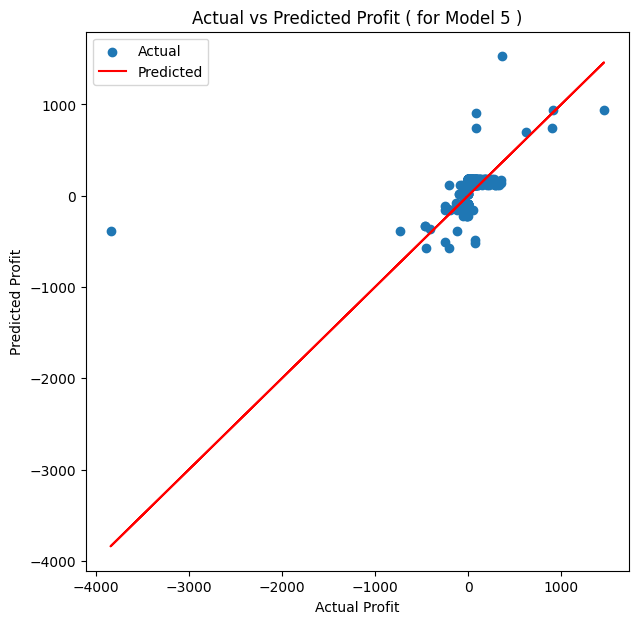

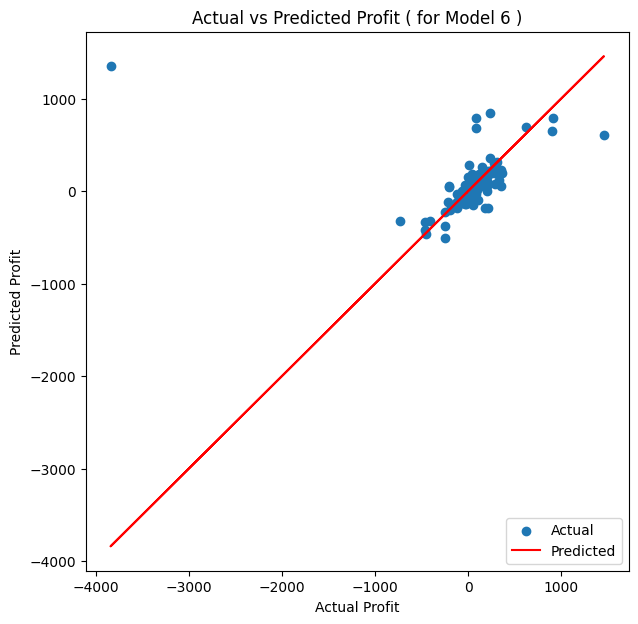

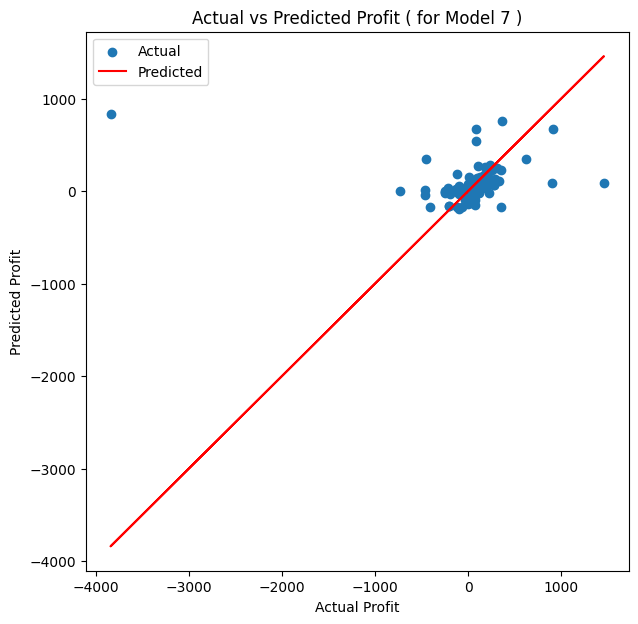

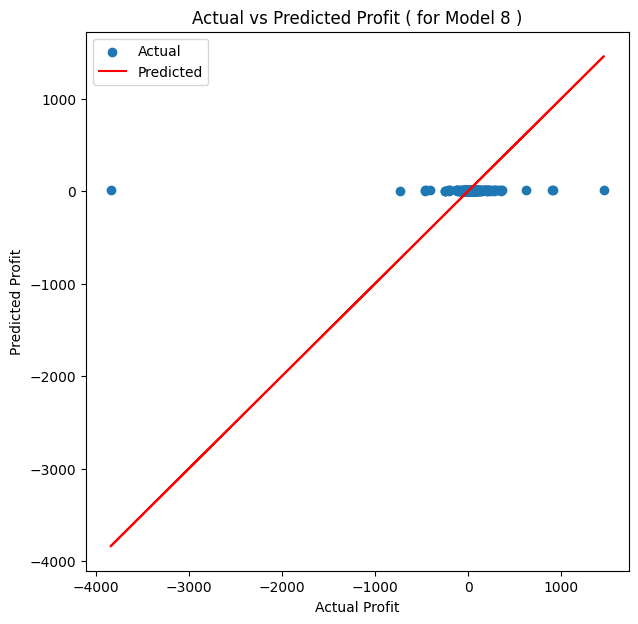

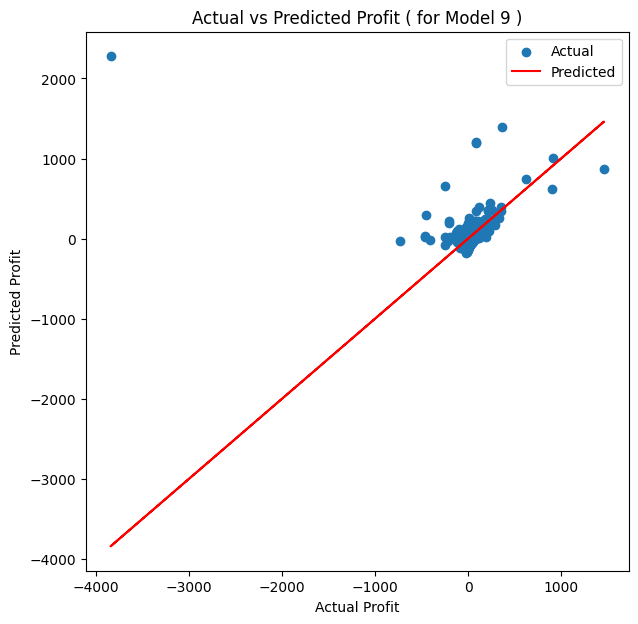

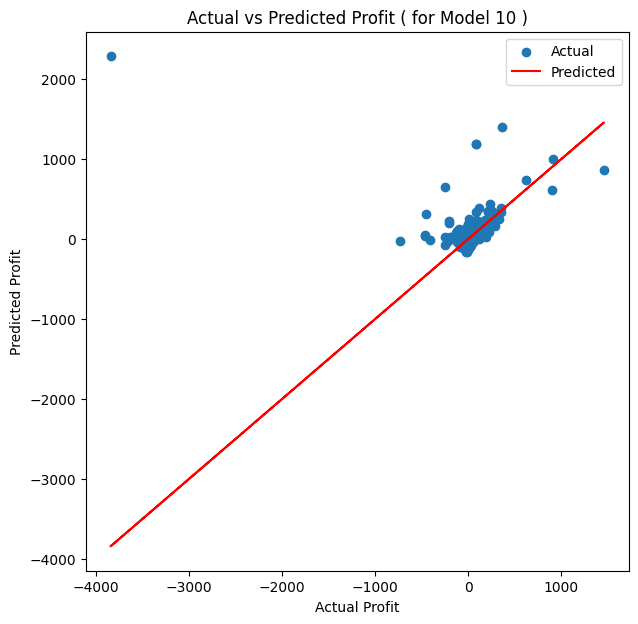

In [40]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  plt.figure(figsize=(7,7))
  plt.scatter(n_test,i)
  plt.plot(n_test,n_test,'r')
  plt.xlabel("Actual Profit")
  plt.ylabel(f"Predicted Profit")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Profit ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1

Mean Squared Error: 48240.81711405612
Root Mean Squared Error: 219.6379227593817
Mean Absolute Error: 39.93123871684243
Explained Variance Score: -0.26972542644273845
R2 Score: -0.2765065018167354


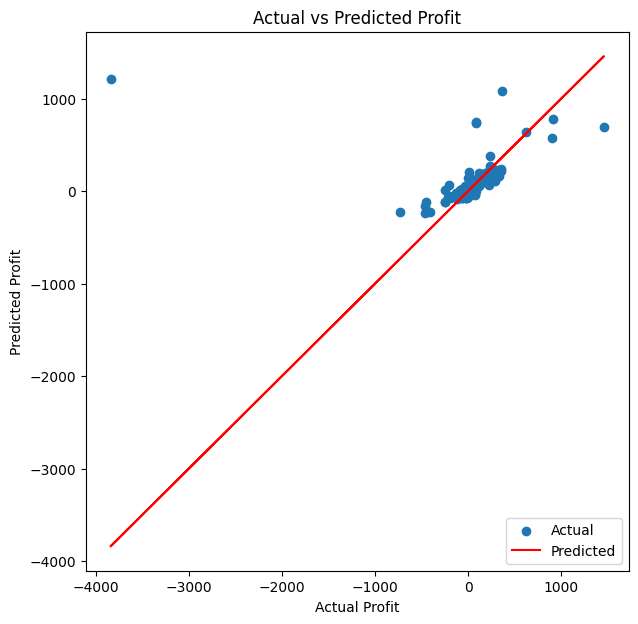

In [41]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(n_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(n_test, pred_final))
print("Explained Variance Score:", explained_variance_score(n_test, pred_final))
print("R2 Score:", r2_score(n_test, pred_final))
plt.figure(figsize=(7,7))
plt.scatter(n_test,pred_final)
plt.plot(n_test,n_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Profit")
plt.show()

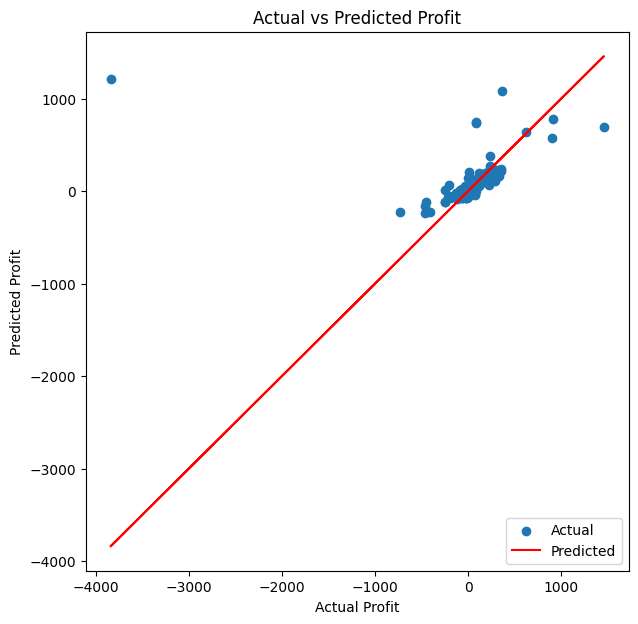

In [42]:
plt.figure(figsize=(7,7))
plt.scatter(n_test,pred_final)
plt.plot(n_test,n_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Profit")
plt.show()